In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from a CSV file
dataset = pd.read_csv('StudentsPerformance.csv')

# Identify any missing values in the dataset
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

# No missing values were found

# Display the data types of each column
print("\nData Types:")
print(dataset.dtypes)

# Normalize the column names to be lowercase and replace spaces with underscores
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')

# Show the initial rows of the dataset
print("\nFirst few rows of the dataset:")
print(dataset.head())

# Encode the 'test preparation course' column
# 'none' will be encoded as 0 and 'completed' will be encoded as 1
label_encoder = LabelEncoder()
dataset['test_preparation_course'] = label_encoder.fit_transform(dataset['test_preparation_course'])

# Save the cleaned dataset to a new CSV file
dataset.to_csv('cleaned_StudentPerformance.csv', index=False)


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

First few rows of the dataset:
   gender race/ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduc

<ipython-input-7-0887dfa2d609>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test_preparation_course', y='math_score', data=data, ci=None)
<ipython-input-7-0887dfa2d609>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test_preparation_course', y='reading_score', data=data, ci=None)
<ipython-input-7-0887dfa2d609>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test_preparation_course', y='writing_score', data=data, ci=None)


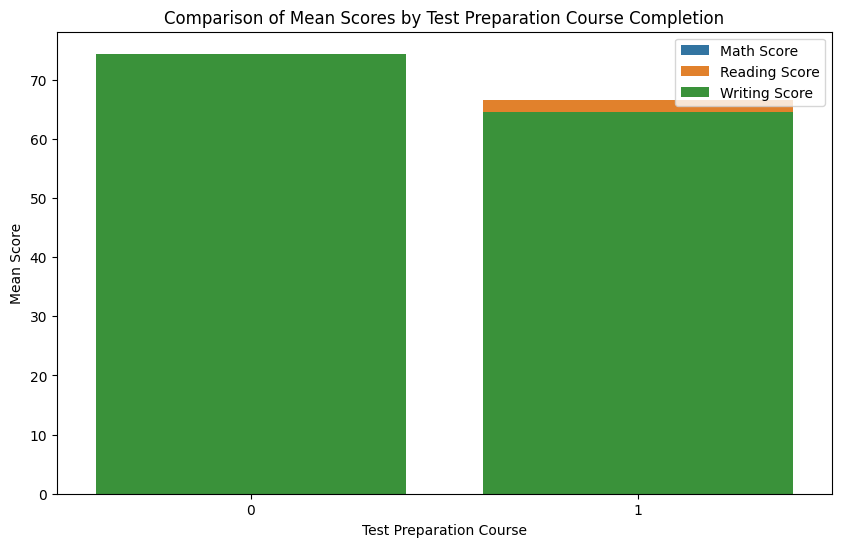

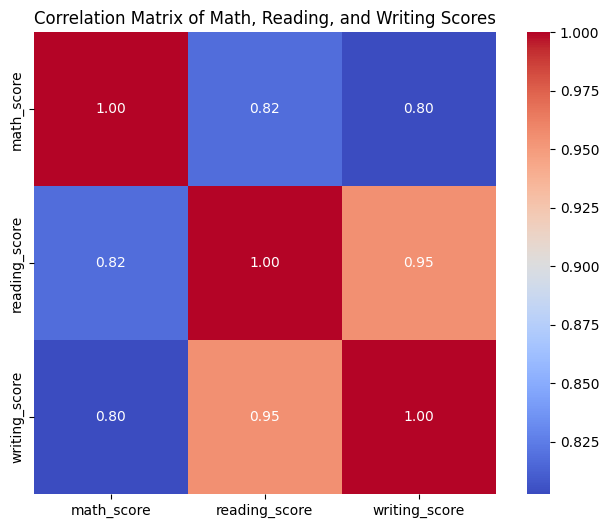

<ipython-input-7-0887dfa2d609>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y='math_score', data=data, ci=None)
<ipython-input-7-0887dfa2d609>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y='reading_score', data=data, ci=None)
<ipython-input-7-0887dfa2d609>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y='writing_score', data=data, ci=None)


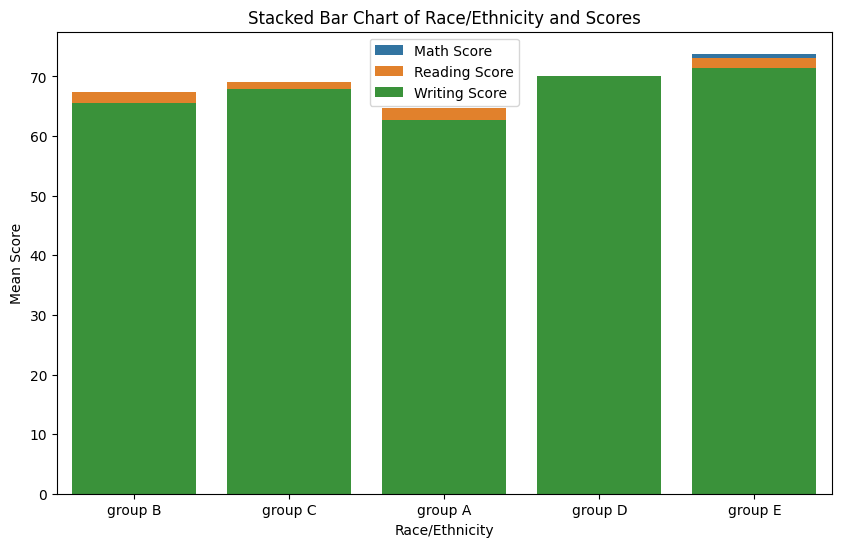

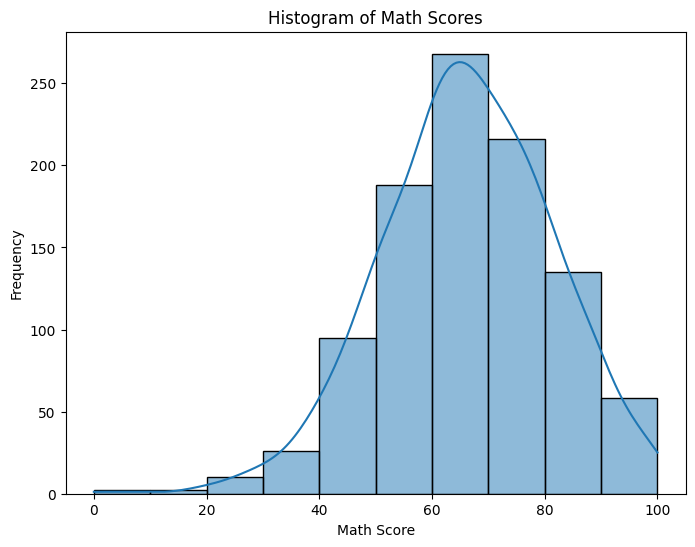

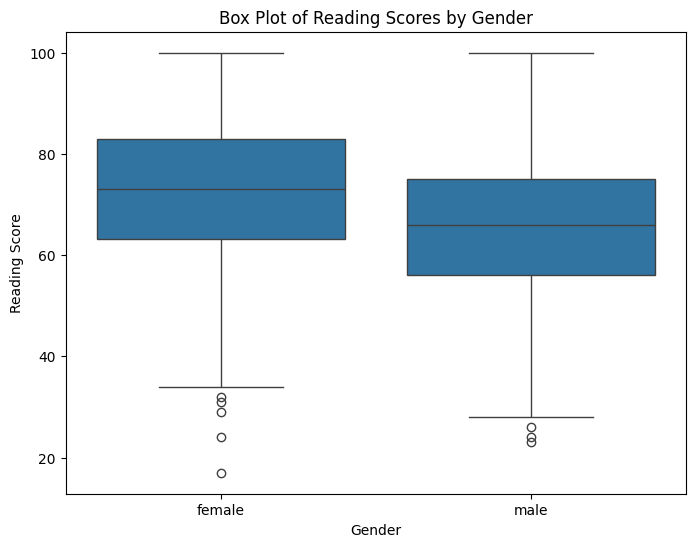

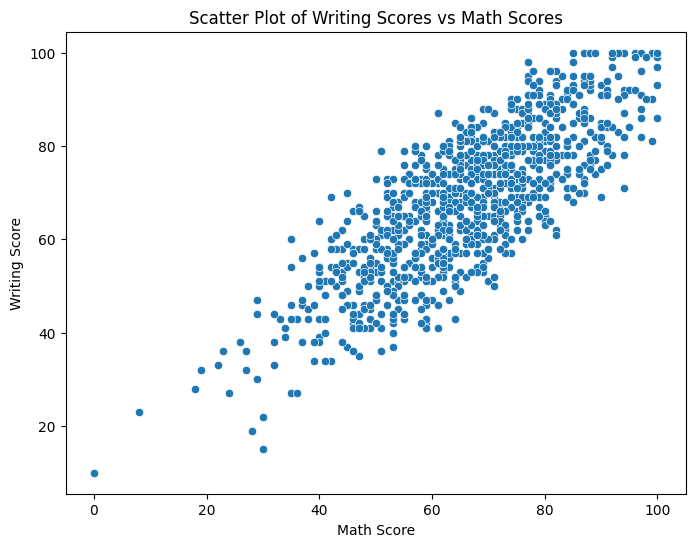

<ipython-input-7-0887dfa2d609>:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parental_level_of_education', y='writing_score', data=data, ci=None)


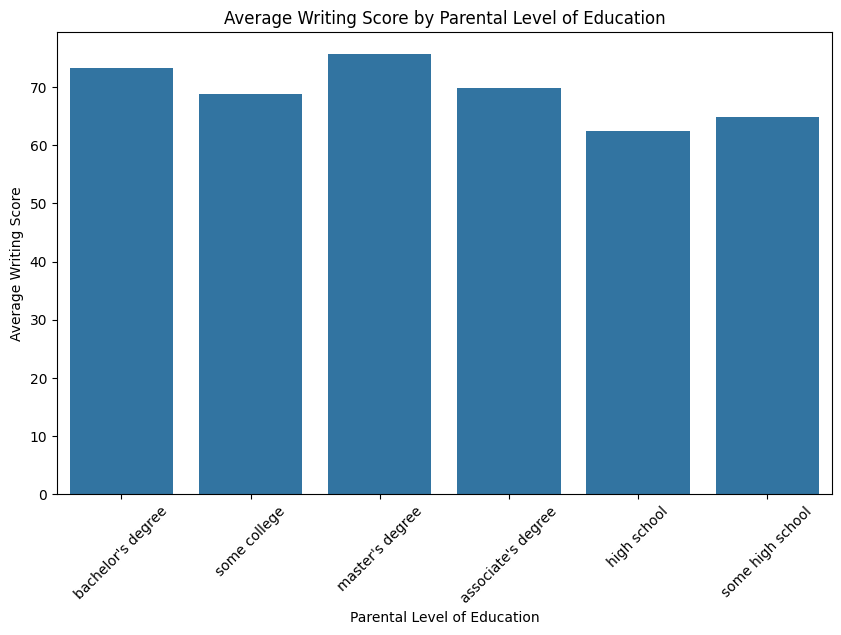

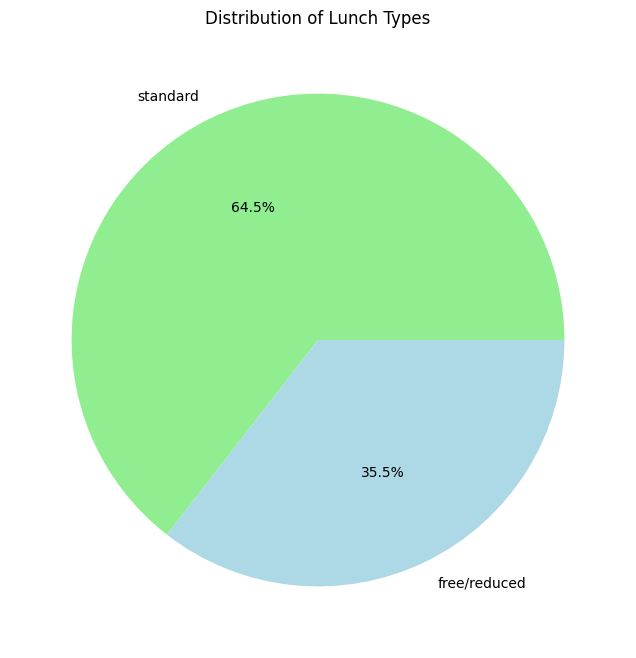

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv('cleaned_StudentPerformance.csv')

# Correlation analysis
# Calculate the correlation matrix for selected scores
correlation_matrix = data[['math_score', 'reading_score', 'writing_score']].corr()

# Compare scores for students who completed and did not complete the test preparation course using bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='test_preparation_course', y='math_score', data=data, ci=None)
sns.barplot(x='test_preparation_course', y='reading_score', data=data, ci=None)
sns.barplot(x='test_preparation_course', y='writing_score', data=data, ci=None)
plt.title('Comparison of Mean Scores by Test Preparation Course Completion')
plt.xlabel('Test Preparation Course')
plt.ylabel('Mean Score')
plt.legend(['Math Score', 'Reading Score', 'Writing Score'])
plt.show()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Math, Reading, and Writing Scores')
plt.show()

# Stacked bar chart of scores by race/ethnicity
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='math_score', data=data, ci=None)
sns.barplot(x='race/ethnicity', y='reading_score', data=data, ci=None)
sns.barplot(x='race/ethnicity', y='writing_score', data=data, ci=None)
plt.title('Stacked Bar Chart of Race/Ethnicity and Scores')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mean Score')
plt.legend(['Math Score', 'Reading Score', 'Writing Score'])
plt.show()

# Histogram of math scores
plt.figure(figsize=(8, 6))
sns.histplot(data['math_score'], bins=10, kde=True)
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

# Box plot of reading scores by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='reading_score', data=data)
plt.title('Box Plot of Reading Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()

# Scatter plot of writing scores versus math scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math_score', y='writing_score', data=data)
plt.title('Scatter Plot of Writing Scores vs Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()

# Bar plot of average writing score by parental level of education
plt.figure(figsize=(10, 6))
sns.barplot(x='parental_level_of_education', y='writing_score', data=data, ci=None)
plt.title('Average Writing Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Writing Score')
plt.xticks(rotation=45)
plt.show()

# Pie chart showing the distribution of lunch types
lunch_distribution = data['lunch'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(lunch_distribution, labels=lunch_distribution.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title('Distribution of Lunch Types')
plt.show()
